# GRIP: The Sparks Foundation
# Data Science & Business Analytics
## Author : Divyansh Puri

### Task 1 : Prediction Using Supervised Machine Learning.


In [1]:
# Firstly importing essential libraries for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
link = "http://bit.ly/w-data"
student_data = pd.read_csv(link)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


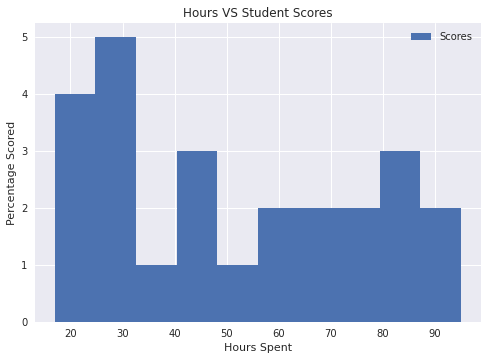

In [3]:
# Plotting the data
plt.style.use('seaborn')
student_data.plot("Hours","Scores",style='o', kind='hist')
plt.title("Hours VS Student Scores")
plt.xlabel("Hours Spent")
plt.ylabel("Percentage Scored");

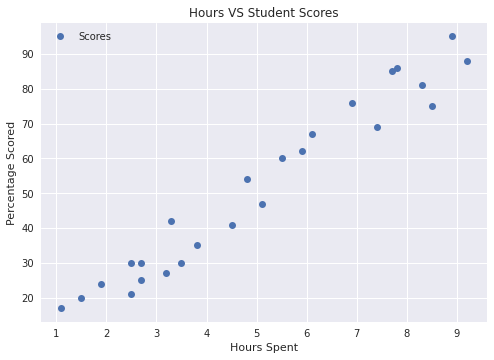

In [4]:
student_data.plot("Hours","Scores",style='o')
plt.title("Hours VS Student Scores")
plt.xlabel("Hours Spent")
plt.ylabel("Percentage Scored");

### Preparing data for Model

In [5]:
x = student_data.drop("Scores", axis=1)
y = student_data["Scores"]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [6]:
# Now we have to Split our data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2 , random_state = 0)

### Traning Algorithm

In [7]:
# Importing the algorithm
from sklearn.linear_model import LinearRegression

# Setting up Random Seed
np.random.seed(42)

# Traing the model
lr = LinearRegression()
lr.fit(x_train, y_train);

### Plotting Model

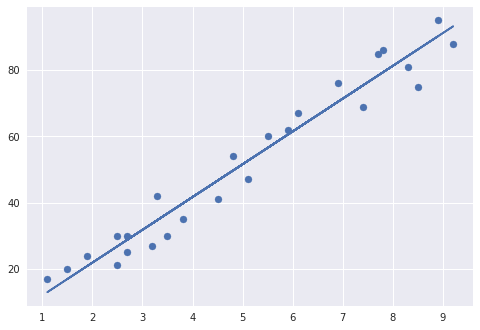

In [8]:
model_line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, model_line);

### Prediction

In [9]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [10]:
y_predict = lr.predict(x_test)

In [11]:
# Comparing the scores
df = pd.DataFrame({"Actual" : y_test , "Predicted" : y_predict})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [12]:
# Now let us test our model with our own data
hours = pd.DataFrame([9.25])
prediction = lr.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Evaluating Model

In [13]:
# Check the scores of the model on our test data
lr.score(x_test, y_test)

0.9454906892105354

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002982
